In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from transformers import DistilBertModel, DistilBertTokenizer, DistilBertConfig

In [2]:
config = DistilBertConfig.from_pretrained("distilbert-base-multilingual-cased")

In [3]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-multilingual-cased")

In [4]:
bert_model = DistilBertModel.from_pretrained("distilbert-base-multilingual-cased")

In [5]:
batch = tokenizer("白日夢冒險王", return_tensors="pt")

In [6]:
batch

{'input_ids': tensor([[ 101, 5715, 4348, 3195, 2478, 8258, 5478,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [34]:
class SonificationModel(nn.Module):
    def __init__(self, bert_model):
        super(SonificationModel, self).__init__()
        self.bert_model = bert_model
        
    def forward(self, X):
        x = self.bert_model(**X, output_hidden_states=True)[1]
        return [torch.tanh(h) for h in x]

In [35]:
model = SonificationModel(bert_model)
with torch.no_grad():    
    outs = model(batch)    

In [36]:
data = torch.zeros(7,768)

In [37]:
len(outs)

7

In [38]:
for idx, hidden_x in enumerate(outs):
    data[idx, :] = hidden_x[0,0,:]
data = data.numpy()

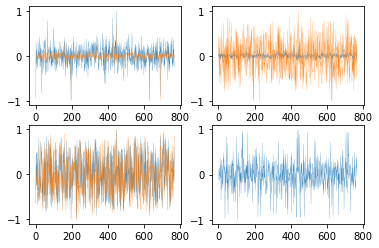

In [39]:
_, axes = plt.subplots(2,2)
for seq_i in range(data.shape[0]):
    ax_idx = seq_i//2
    axes[ax_idx//2][ax_idx%2].plot(data[seq_i, :], linewidth=0.2)

In [40]:
np.save("data.npy", data)